In [50]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

import matplotlib

# # matplotlib 설정
# matplotlib.rcParams['font.family'] = 'AppleGothic'
# matplotlib.rcParams['font.size'] = 15
# matplotlib.rcParams['axes.unicode_minus'] = False

In [34]:
# df1 = pd.read_csv('/Users/taewon/Documents/금융 빅데이터/project_1/trash/re_data.csv', encoding='utf-8')
# df2 = pd.read_csv('/Users/taewon/Documents/금융 빅데이터/project_1/인사이트data_2.csv')

In [35]:
# df1 = df1[['엔젤투자자 혹은 액셀러레이터 투자 경험여부',
#            '창업 당시 창업자 실무경험 년수(년)','창업 직전 근무지',
#            '부서별_인력구성(생산)','부서별_인력구성(RnD)',
#            '총자산회전율','순이익률','이자보상배율',
#            '주력제품 국내 시장점유율(퍼센트)','주력제품 해외 시장점유율(퍼센트)',
#            '학력별 인력구성비(대졸)','창업 당시 목표시장',
#            '해외수출 및 진출과정 애로사항','벤처캐피털(투자조합포함) 투자 경험여부']]

In [36]:
# len(df1[df1['벤처캐피털(투자조합포함) 투자 경험여부']==1])

917

In [37]:
# len(df1[df1['벤처캐피털(투자조합포함) 투자 경험여부']==0])

11467

In [38]:
from imblearn.over_sampling import RandomOverSampler

In [69]:
# # 독립변수와 종속변수 설정
# X = df1.iloc[:,:-1]
# y = df1['벤처캐피털(투자조합포함) 투자 경험여부']

# # 다수 클래스는 그대로 두고 소수 클래스만 늘리는 RandomOverSampler 객체 생성
# ros = RandomOverSampler(sampling_strategy={1: 5735}, random_state=0)

# # 리샘플링 수행
# X_resampled, y_resampled = ros.fit_resample(X, y)

# print(X_resampled.shape, y_resampled.shape)

In [40]:
# # 오버샘플링된 데이터를 데이터프레임으로 변환
# df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
# df_resampled['벤처캐피털(투자조합포함) 투자 경험여부'] = y_resampled

In [41]:
# df1 = df_resampled

In [ ]:
# print(len(df1[df1['벤처캐피털(투자조합포함) 투자 경험여부']==1]))
# print(len(df1[df1['벤처캐피털(투자조합포함) 투자 경험여부']==0]))

In [43]:
import numpy as np

from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, roc_curve, auc
from sklearn.model_selection import cross_val_score, cross_validate

Mean Accuracy: 0.7013142136885573
Mean Recall: 0.24969485614646905
Mean Precision: 0.6315026213614878
Mean F1 score: 0.3576598349803305


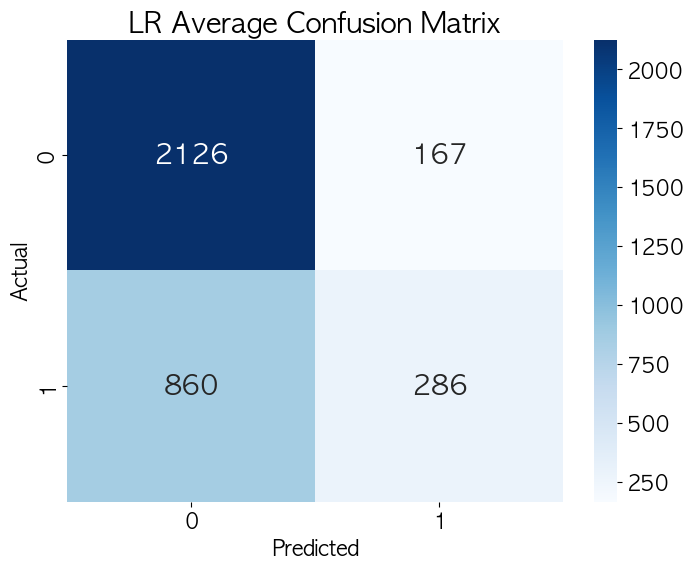

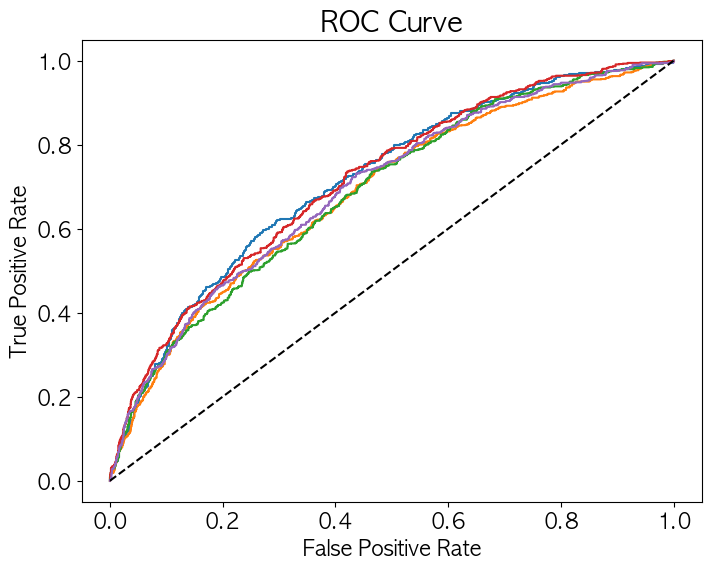

Mean ROC AUC: 0.7011655474792267


In [70]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression

X = df1.iloc[:,:-1]
y = df1['벤처캐피털(투자조합포함) 투자 경험여부']

# 모델 생성
model = LogisticRegression()

# 교차검증 수행
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
f1_scores = []
accuracy_scores = []
recall_scores = []
precision_scores = []
confusion_matrices = []
roc_auc_scores = []
fprs = []
tprs = []

for train_index, test_index in cv.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # 모델 학습
    model.fit(X_train, y_train)
    
    # 예측
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # 평가 지표 계산
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    # 결과 저장
    f1_scores.append(f1)
    accuracy_scores.append(accuracy)
    recall_scores.append(recall)
    precision_scores.append(precision)
    confusion_matrices.append(confusion)
    roc_auc_scores.append(roc_auc)
    
    # ROC 곡선 계산
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    fprs.append(fpr)
    tprs.append(tpr)

# 평균 정확도, F1 점수 출력
print('Mean Accuracy:', np.mean(accuracy_scores))
print('Mean Recall:', np.mean(recall_scores))
print('Mean Precision:', np.mean(precision_scores))
print('Mean F1 score:', np.mean(f1_scores))


# 혼돈 행렬 합산
average_confusion_matrix = np.sum(confusion_matrices, axis=0)

# 혼돈 행렬 평균 계산
average_confusion_matrix = average_confusion_matrix.astype('int64')
average_confusion_matrix //= len(confusion_matrices)

# 히트맵 출력
plt.figure(figsize=(8, 6))
sns.heatmap(average_confusion_matrix, annot=True, cmap='Blues', fmt='d', annot_kws={'fontsize': 20})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('LR Average Confusion Matrix', fontsize=20)
plt.show()

# ROC 곡선 그리기
plt.figure(figsize=(8, 6))
for fpr, tpr in zip(fprs, tprs):
    plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', fontsize=20)
plt.show()

# AUC 출력
print('Mean ROC AUC:', np.mean(roc_auc_scores))

Mean Accuracy: 0.8880357758358508
Mean Recall: 0.7588491717523975
Mean Precision: 0.8890096259975915
Mean F1 score: 0.8187814538498456


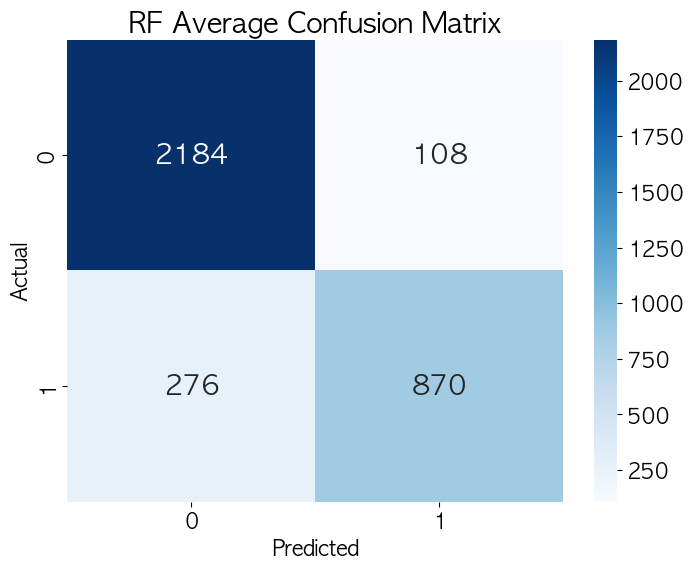

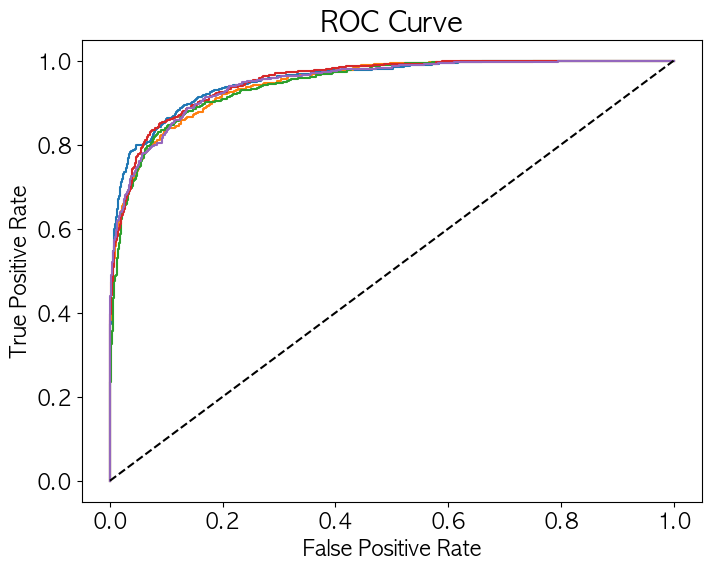

Mean ROC AUC: 0.949408428211082


In [51]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, precision_score, recall_score, f1_score

X = df1.iloc[:,:-1]
y = df1['벤처캐피털(투자조합포함) 투자 경험여부']


# 모델 생성
model = RandomForestClassifier(max_depth=10)

# 교차검증 수행
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
f1_scores = []
accuracy_scores = []
recall_scores = []
precision_scores = []
confusion_matrices = []
roc_auc_scores = []
fprs = []
tprs = []

for train_index, test_index in cv.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # 모델 학습
    model.fit(X_train, y_train)
    
    # 예측
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # 평가 지표 계산
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    # 결과 저장
    f1_scores.append(f1)
    accuracy_scores.append(accuracy)
    recall_scores.append(recall)
    precision_scores.append(precision)
    confusion_matrices.append(confusion)
    roc_auc_scores.append(roc_auc)
    
    # ROC 곡선 계산
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    fprs.append(fpr)
    tprs.append(tpr)

# 평균 정확도, F1 점수 출력
print('Mean Accuracy:', np.mean(accuracy_scores))
print('Mean Recall:', np.mean(recall_scores))
print('Mean Precision:', np.mean(precision_scores))
print('Mean F1 score:', np.mean(f1_scores))


# 혼돈 행렬 합산
average_confusion_matrix = np.sum(confusion_matrices, axis=0)

# 혼돈 행렬 평균 계산
average_confusion_matrix = average_confusion_matrix.astype('int64')
average_confusion_matrix //= len(confusion_matrices)

# 히트맵 출력
plt.figure(figsize=(8, 6))
sns.heatmap(average_confusion_matrix, annot=True, cmap='Blues', fmt='d', annot_kws={'fontsize': 20})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('RF Average Confusion Matrix', fontsize=20)
plt.show()

# ROC 곡선 그리기
plt.figure(figsize=(8, 6))
for fpr, tpr in zip(fprs, tprs):
    plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', fontsize=20)
plt.show()

# AUC 출력
print('Mean ROC AUC:', np.mean(roc_auc_scores))


In [66]:
df1['엔젤투자자 혹은 액셀러레이터 투자 경험여부'] = df1['엔젤투자자 혹은 액셀러레이터 투자 경험여부'].astype(int)
df1['창업 직전 근무지'] = df1['창업 직전 근무지'].astype(int)
df1['창업 당시 목표시장'] = df1['창업 당시 목표시장'].astype(int)
df1['창업 당시 창업자 실무경험 년수(년)'] = df1['창업 당시 창업자 실무경험 년수(년)'].astype(int)
df1['해외수출 및 진출과정 애로사항'] = df1['해외수출 및 진출과정 애로사항'].astype(int)

Mean Accuracy: 0.9299500212891061
Mean Recall: 0.8967741935483872
Mean Precision: 0.8935145694633724
Mean F1 score: 0.8951212460889792


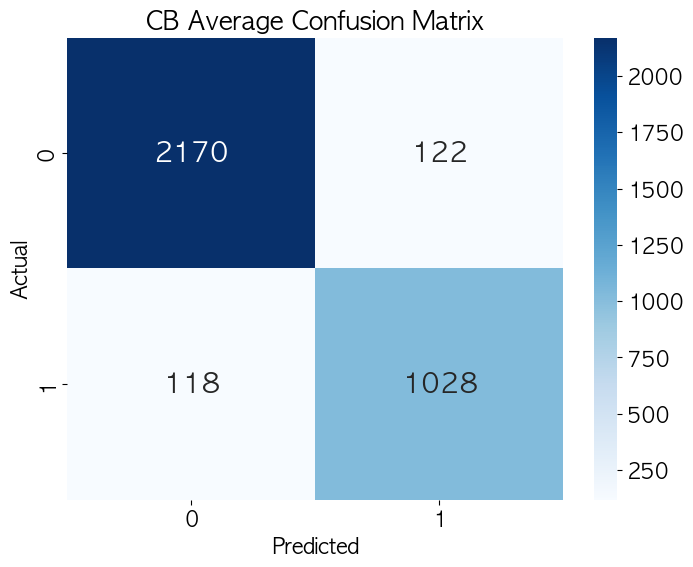

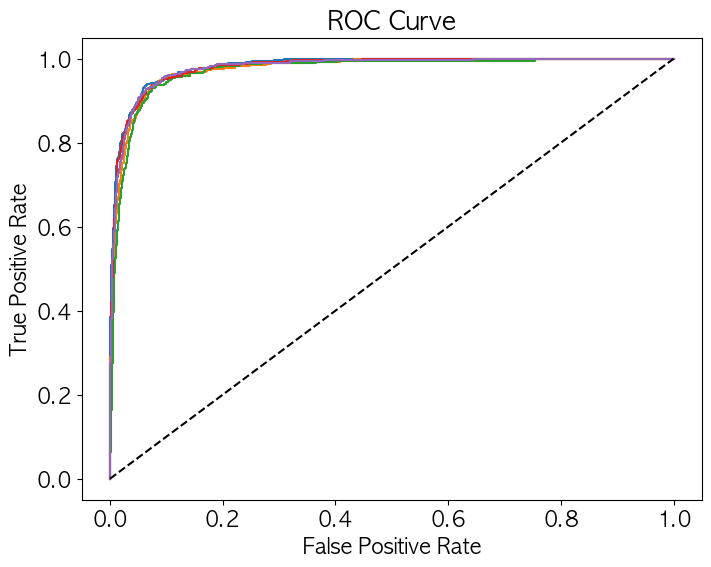

Mean ROC AUC: 0.9774746798208914


In [68]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, precision_score, recall_score, f1_score
from catboost import CatBoostClassifier

X = df1.iloc[:,:-1]
y = df1['벤처캐피털(투자조합포함) 투자 경험여부']

# 모델 생성
model = CatBoostClassifier(verbose=False, cat_features=['창업 직전 근무지', '엔젤투자자 혹은 액셀러레이터 투자 경험여부',
                                                        '창업 당시 목표시장', '해외수출 및 진출과정 애로사항',
                                                        '창업 당시 창업자 실무경험 년수(년)'])

# 교차검증 수행
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
f1_scores = []
accuracy_scores = []
recall_scores = []
precision_scores = []
confusion_matrices = []
roc_auc_scores = []
fprs = []
tprs = []

for train_index, test_index in cv.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # 모델 학습
    model.fit(X_train, y_train)
    
    # 예측
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # 평가 지표 계산
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    # 결과 저장
    f1_scores.append(f1)
    accuracy_scores.append(accuracy)
    recall_scores.append(recall)
    precision_scores.append(precision)
    confusion_matrices.append(confusion)
    roc_auc_scores.append(roc_auc)
    
    # ROC 곡선 계산
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    fprs.append(fpr)
    tprs.append(tpr)

# 평균 정확도, F1 점수 출력
print('Mean Accuracy:', np.mean(accuracy_scores))
print('Mean Recall:', np.mean(recall_scores))
print('Mean Precision:', np.mean(precision_scores))
print('Mean F1 score:', np.mean(f1_scores))



# 혼돈 행렬 합산
average_confusion_matrix = np.sum(confusion_matrices, axis=0)

# 혼돈 행렬 평균 계산
average_confusion_matrix = average_confusion_matrix.astype('int64')
average_confusion_matrix //= len(confusion_matrices)

# 히트맵 출력
plt.figure(figsize=(8, 6))
sns.heatmap(average_confusion_matrix, annot=True, cmap='Blues', fmt='d', annot_kws={'fontsize':20})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('CB Average Confusion Matrix')
plt.show()


# # 혼돈 행렬 출력
# for i, confusion in enumerate(confusion_matrices):
#     print(f'Confusion Matrix {i+1}:')
#     print(confusion)
#     print()

# ROC 곡선 그리기
plt.figure(figsize=(8, 6))
for fpr, tpr in zip(fprs, tprs):
    plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# AUC 출력
print('Mean ROC AUC:', np.mean(roc_auc_scores))
